# <center> <font color='green'>GRIP :THE SPARKs FOUNDATION</font></center>

# <center><font color='green'>Data Science and Business Analytics Intern</font></center>

# <center><font color="green">Author : ABHISHEK RAUNIYAR</font></color>

# <center><font color="green">Task (4) : Exploratory Data Analysis of  Global-Terrorism Data-Set</font></color>

In this task we have to find out the hot zone of terrorism and we have to find security issues.

<center><img src='https://resize.indiatvnews.com/en/resize/newbucket/1200_-/2022/05/pjimage-2022-05-21t074303-1653099191.jpg'></center>

# TABLE CONTENT
1.   [Importing Libarires](#imp)
2.   [Read Data Set](#rea)
3.   [Creating New Data Frame](#cre)
4.   [Cleaning The Data Set](#clea)
5.   [ Analyze Attack-type and country column ](#vac)
6.  [Analyze Attack-type and Region column ](#var)
7.  [Analyze Attack-type and Target column](#vat)
8.   [Analyze Attack-type and Year column ](#vay)
9.    [Analyze Attack-type and Department column](#vad)
10.  [ Analyze Attack-type and Weapon-Type column ](#vaw)
11.  [Conclusion](#coc)

# STEP:1 Importing Libraries<a class='anchor' id='import'></a>

In [1]:
#for handling warnings 
import warnings
warnings.filterwarnings('ignore')

# Standard library
import numpy as np
import pandas as pd 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sng

# STEP:2 Reading Data Set<a class='anchor' id='rea'></a>

In [2]:
# Read data set
data = pd.read_csv("globalterrorism.csv", encoding="latin-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
## To find number of rows and columns
print('Shape of the data set is :',data.shape)

Shape of the data set is : (181691, 135)


In [4]:
#To find information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# STEP:3 Creating New Data Frame<a class='anchor' id='cre'></a>

In [5]:
### Here we renaming the some columns. 
data.rename(columns={'iyear':'YEAR','imonth':'MONTH','iday':'DAY','country_txt':'COUNTRY','region_txt':'REGION','attacktype1_txt':'ATTACK-TYPE',
                     'targtype1_txt':'TARGET','city':'CITY','targsubtype1_txt':'DEPARTMENT','motive':'MOTIVE','weaptype1_txt':'WEAPON-TYPE','nkill':'KILL'},inplace=True)

In [6]:
## Here we show that data set have column as mention
data.head()

,eventid,YEAR,MONTH,DAY,approxdate,extended,resolution,country,COUNTRY,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
## Here we create new data frame name as df from given data-set.
df=data[['YEAR','MONTH','DAY','COUNTRY','REGION','CITY','latitude','longitude','ATTACK-TYPE','TARGET','DEPARTMENT','WEAPON-TYPE','KILL','MOTIVE']]

In [8]:
df.head()

,YEAR,MONTH,DAY,COUNTRY,REGION,CITY,latitude,longitude,ATTACK-TYPE,TARGET,DEPARTMENT,WEAPON-TYPE,KILL,MOTIVE
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Unknown,1.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,NaN


In [9]:
df.shape

(181691, 14)

# Step:-4 Cleaning the data set<a class='anchor' id='clea'></a>

In [10]:
## Checking the null values
df.isnull().sum()

YEAR                0
MONTH               0
DAY                 0
COUNTRY             0
REGION              0
CITY              435
latitude         4556
longitude        4557
ATTACK-TYPE         0
TARGET              0
DEPARTMENT      10373
WEAPON-TYPE         0
KILL            10313
MOTIVE         131130
dtype: int64

In [11]:
## Here we fill all NAN values with None
df.fillna('None',inplace=True)

In [12]:
## Checking the null values
df.isnull().sum()

YEAR           0
MONTH          0
DAY            0
COUNTRY        0
REGION         0
CITY           0
latitude       0
longitude      0
ATTACK-TYPE    0
TARGET         0
DEPARTMENT     0
WEAPON-TYPE    0
KILL           0
MOTIVE         0
dtype: int64

In [13]:
df.head()

,YEAR,MONTH,DAY,COUNTRY,REGION,CITY,latitude,longitude,ATTACK-TYPE,TARGET,DEPARTMENT,WEAPON-TYPE,KILL,MOTIVE
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Unknown,1.0,None
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0,None
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1.0,None
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives,None,None
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,None,None


# Step:-5 Analyze Attack-type and country column <a class='anchor' id='vac'></a>

In [14]:
## Find the different attack in attack-type column in data-set df.
df['ATTACK-TYPE'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [15]:
## Here we find total number of different country where attack happens. 
len(df['COUNTRY'].unique())

205

<Axes: xlabel='ATTACK-TYPE'>

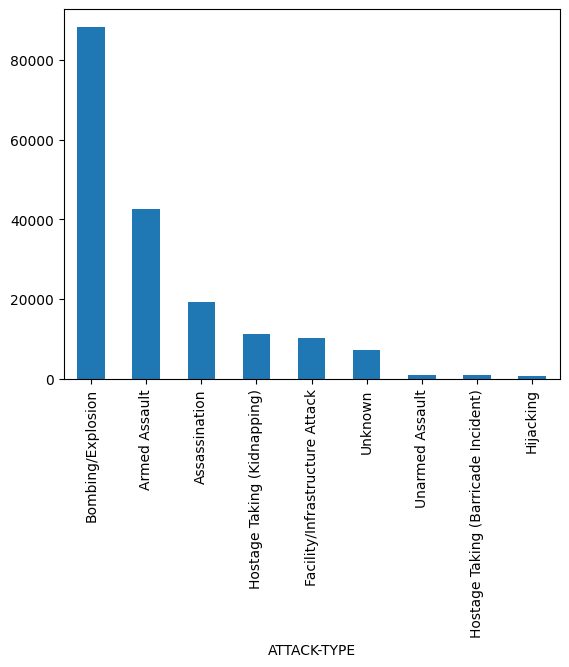

In [16]:
### Here we plot bar graph of attack-type on the basis of country.
df.groupby('ATTACK-TYPE').count()['COUNTRY'].sort_values(ascending=False).plot(kind='bar')

From above graph we clearly see most of the attck happen by Bombing/Explosion in country.

<Axes: xlabel='COUNTRY'>

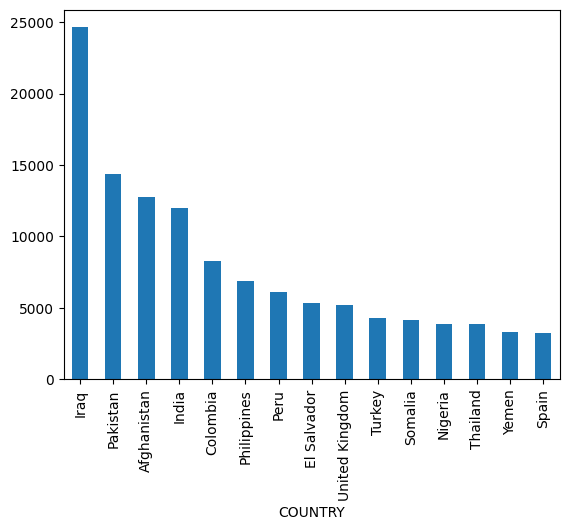

In [17]:
### Here we plot bar graph of country on the basis of attack-type.
df.groupby('COUNTRY').count()['ATTACK-TYPE'].nlargest(15).sort_values(ascending=False).plot(kind='bar')

From above graph we clearly see that most of the attack happen in iraq then in pakistan,afghanistan,India,Colombia in decreasing order.

# Step:-6 Analyze Attack-type and Region column <a class='anchor' id='var'></a>

In [18]:
## Find the different region in region column of data-set df.
df['REGION'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

<Axes: xlabel='ATTACK-TYPE'>

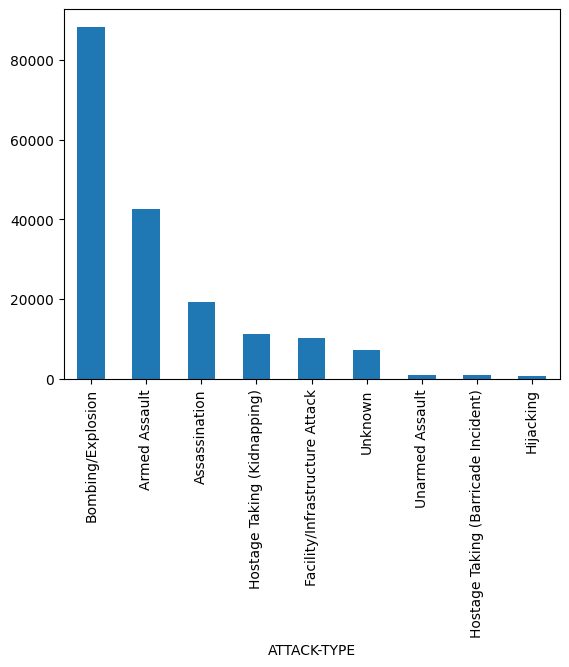

In [19]:
### Here we plot bar graph of attack-type on the basis of country .
df.groupby('ATTACK-TYPE').count()['REGION'].sort_values(ascending=False).plot(kind='bar')

From above graph we clearly see most of the attck happen by Bombing/Explosion in region.

<Axes: xlabel='REGION'>

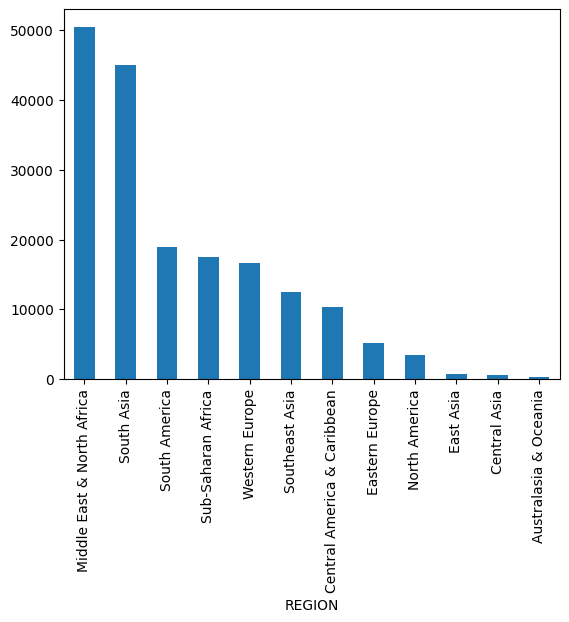

In [20]:
### Here we plot bar graph of region on the basis of attack-type.
df.groupby('REGION').count()['ATTACK-TYPE'].sort_values(ascending=False).plot(kind='bar')

Find the different attack in attack-type column in data-set df.From above we clearly see that most of the attck happen in Middle East & North Africa.

In [21]:
## Here we create a data-frame name as df_region for Middle East & North Africa region.
df_region=df[df['REGION']=='Middle East & North Africa']

In [22]:
### Here we see country name in df_region for analyzing in which country most of the attack happen in Middle East & North Africa.
df_region['COUNTRY'].value_counts()

COUNTRY
Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: count, dtype: int64

Here we see that most of the attack happen in Middle East & North Africa region and we see that most of the attack happen in iraq country.

<font color='green'> Thus hot zone of terrorism is Middle East & North Africa region.

<font color='green'>More specially hot zone is Country Iraq.

# Step:-7 Analyze Attack-type and Target column <a class='anchor' id='vat'></a>

In [23]:
df['TARGET'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

<Axes: xlabel='TARGET'>

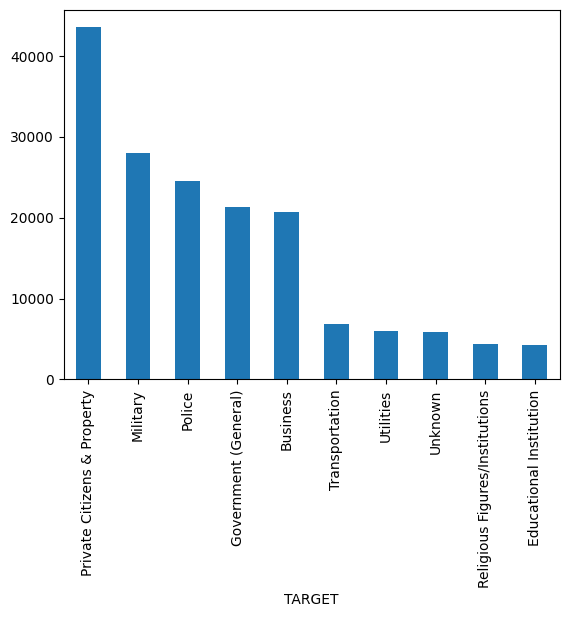

In [24]:
### Here we plot bar graph of Target on the basis of attack-type.
df.groupby('TARGET').count()['ATTACK-TYPE'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From here we clearly see that they mainly target Private Citizens & Property then Military,Police,Government(General),Business in decreasing order.

Thus we have mainly security issues for public and their property.So we have to design strong security system and monitor it at each step and also give awarness to people for there security such that what they do and not to do.

Now we saw this thing for country Iraq.

In [25]:
## Here we create a data-frame name as df_iraq for country iraq.
df_iraq=df[df['COUNTRY']=='Iraq']

In [26]:
## Here we see target column for analyzing the target of the terrorist in iraq.
df_iraq['TARGET'].value_counts()


TARGET
Private Citizens & Property       8747
Police                            3682
Military                          3333
Government (General)              2216
Business                          2112
Unknown                           1286
Terrorists/Non-State Militia       958
Religious Figures/Institutions     661
Transportation                     472
Utilities                          337
Educational Institution            271
Journalists & Media                178
Government (Diplomatic)            127
Violent Political Party             79
Other                               60
Airports & Aircraft                 32
NGO                                 28
Food or Water Supply                25
Telecommunication                   21
Tourists                             9
Maritime                             2
Name: count, dtype: int64

In Iraq also most of the target of terrorist is Private Citizens & Property.


In [27]:
df.head()

,YEAR,MONTH,DAY,COUNTRY,REGION,CITY,latitude,longitude,ATTACK-TYPE,TARGET,DEPARTMENT,WEAPON-TYPE,KILL,MOTIVE
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Unknown,1.0,None
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0,None
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1.0,None
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives,None,None
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,None,None


# Step:-8 Analyze Attack-type and Year column <a class='anchor' id='vay'></a>

In [28]:
## Here we find different years in which attack happen for given data set.
df['YEAR'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

<Axes: xlabel='YEAR'>

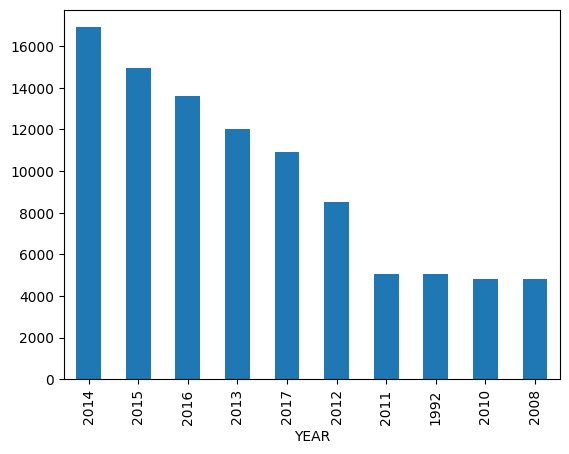

In [29]:
### Here we plot bar graph of year on the basis of attack-type.
df.groupby('YEAR').count()['ATTACK-TYPE'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From here we clearly see that most of the attack happen in year 2014 then in 2015,2016,2013,2017 and so on in decreasing order.

<Axes: xlabel='ATTACK-TYPE'>

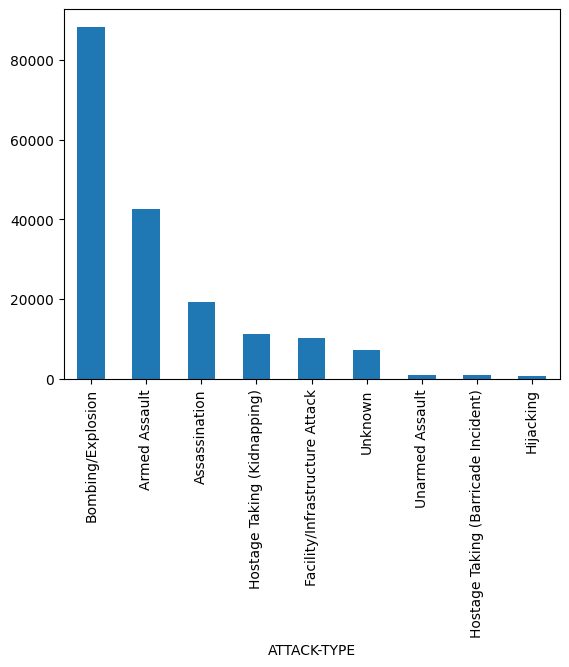

In [30]:
### Here we plot bar graph of Attack-type on the basis of year.
df.groupby('ATTACK-TYPE').count()['YEAR'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From here we clearly visualize that most of the attck happen by bombing/explosion.

<Axes: xlabel='YEAR'>

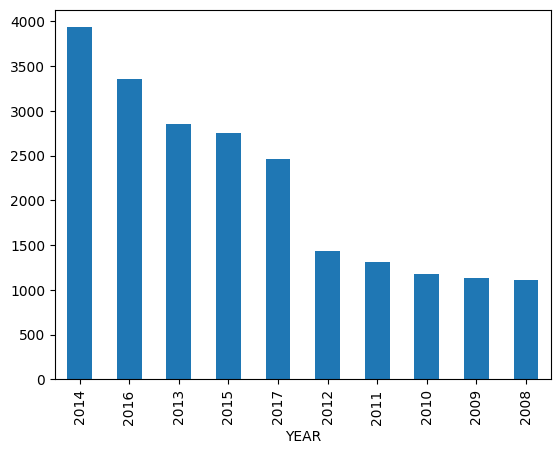

In [31]:
### Here we plot bar graph of Year on the basis of attack-type for iraq.
### Here we analyze for country iraq in which year most of the time attack happen.
df_iraq.groupby('YEAR').count()['ATTACK-TYPE'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

In iraq also most of the attack happen in year 2014 then in 2016,2013,2015,2017 so on in decreasing order.

# Step:-9 Analyze Attack-type and Department column <a class='anchor' id='vad'></a>

In [32]:
## Here we find total no of different department where attack happened.
len(df['DEPARTMENT'].unique())

113

<Axes: xlabel='DEPARTMENT'>

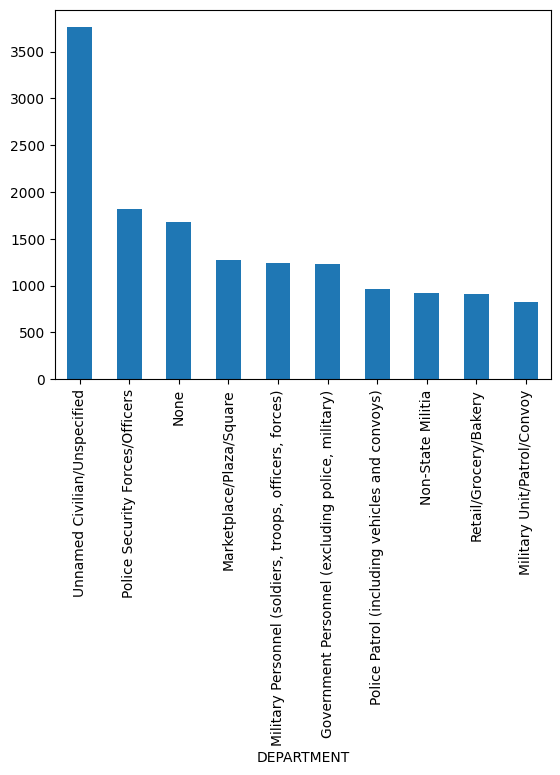

In [33]:
### Here we plot bar graph of Department on the basis of attack-type.
df_iraq.groupby('DEPARTMENT').count()['ATTACK-TYPE'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From above we see that most of the attack happen in Unnamed civilian/Unspecified

<Axes: xlabel='ATTACK-TYPE'>

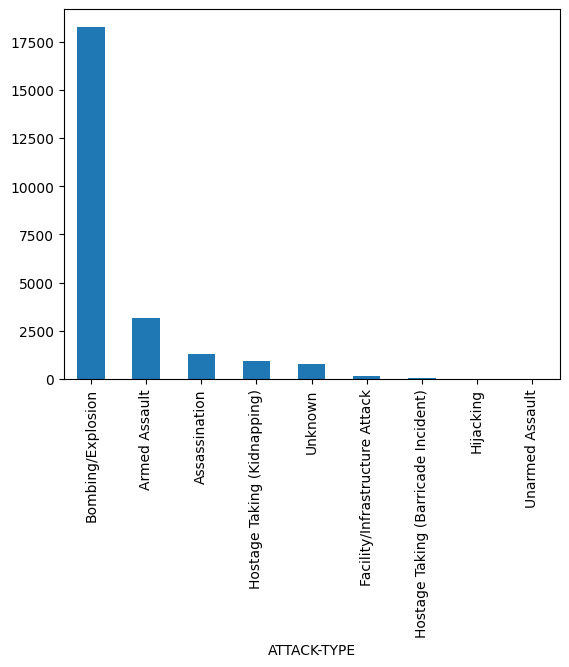

In [34]:
### Here we plot bar graph of Attack-type on the basis of Department.
df_iraq.groupby('ATTACK-TYPE').count()['DEPARTMENT'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From here we clearly visualize that most of the attck happen by bombing/explosion.

# Step:-10 Analyze Attack-type and Weapon-Type column <a class='anchor' id='vaw'></a>

In [35]:
### Here we find different type of weapons used by terrorist.
df['WEAPON-TYPE'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

<Axes: xlabel='WEAPON-TYPE'>

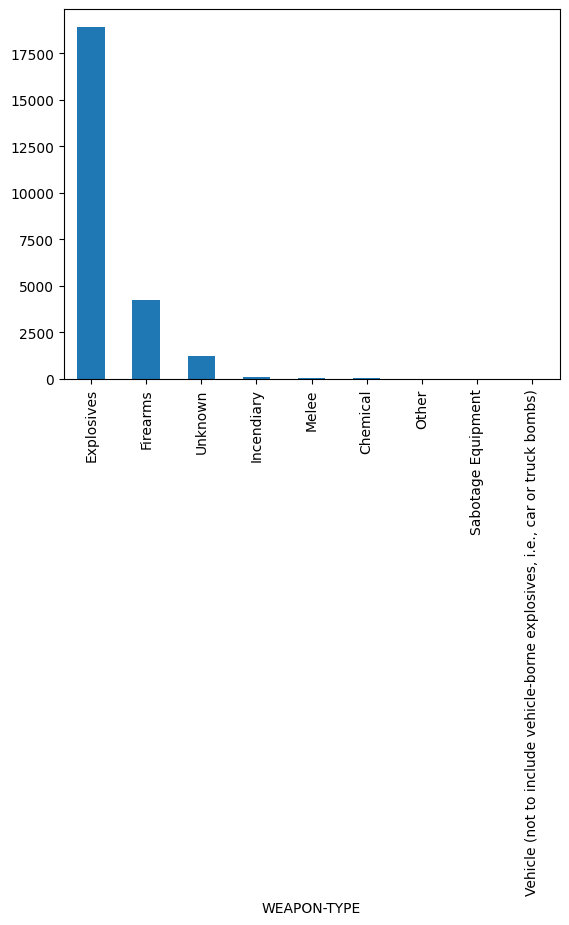

In [36]:
### Here we plot bar graph of weapon-type on the basis of attack-type.
df_iraq.groupby('WEAPON-TYPE').count()['ATTACK-TYPE'].nlargest(10).sort_values(ascending=False).plot(kind='bar')

From above we clearly see that terrorist uses most of the explosive as a weapons.

Thus we have to increase security and also find out the supply chain of explosive then take appropriate action.

# Step:-11 Conclusion<a class='anchor' id='coc'></a>

### <font color='green'>(1) The hot zone of terrorism is IRAQ country which is in Middle East & North Africa region.

### <font color='green'>(2) They mainly target Private Citizens & Property .Thus we have mainly security issues for public and their property.So we have to design strong security system and monitor it at each step and also give awarness to people for there security such that what they do and not to do.

### <font color='green'>(3) Most of the attack happen all over the world  and also in IRAQ in year 2014 .

### <font color='green'>(4) Most of the attack happen in Unnamed civilian/Unspecified .

### <font color='green'>(5) Terrorist uses most of the explosive as a weapons.Thus we have to increase security and also find out the supply chain of explosive then take appropriate action.